In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

### LPF, HPF
- Low-pass filter: removing noise, blurring images
- High-pass filter: finding edges

In [2]:
def cv_show(name, img):
    cv.imshow(name, img)
    cv.waitKey()
    cv.destroyAllWindows()

In [3]:
logo = cv.imread('../images/logo.png')
cv_show('LOGO', logo)

In [4]:
kernel = np.ones((5, 5), np.float32) / 25
dst = cv.filter2D(logo, -1, kernel)
cv_show('dst', dst)

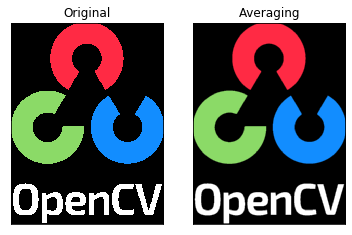

In [5]:
logo = cv.cvtColor(logo, cv.COLOR_BGR2RGB)
dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(logo), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Averagng Blurring

### 使用均值滤波平滑图像可以通过cv.blur()和cv.boxFilter()两种方法实现, 当cv.boxFilter()的参数normalze=True的时候，与cv.blur()效果一样
- dst=cv.blur(src, ksize[, dst[, anchor[, borderType]]])
- dst=cv.boxFilter(src, ddepth, ksize[, dst[, anchor[, normalize[, borderType]]]])

### cv.blur()使用的卷积核是
$$\texttt{K} = \frac{1}{\texttt{ksize.width*ksize.height}} \begin{bmatrix} 1 & 1 & 1 & \cdots & 1 & 1 \\ 1 & 1 & 1 & \cdots & 1 & 1 \\ \cdots \\ 1 & 1 & 1 & \cdots & 1 & 1 \\ \end{bmatrix}$$

### cv.boxFlter()使用的卷积核是
$$\texttt{K} = \alpha \begin{bmatrix} 1 & 1 & 1 & \cdots & 1 & 1 \\ 1 & 1 & 1 & \cdots & 1 & 1 \\ \cdots \\ 1 & 1 & 1 & \cdots & 1 & 1 \end{bmatrix}$$
$$\alpha = \begin{cases} \frac{1}{\texttt{ksize.width*ksize.height}} & \texttt{when } \texttt{normalize=true} \\1 & \texttt{otherwise}\end{cases}$$

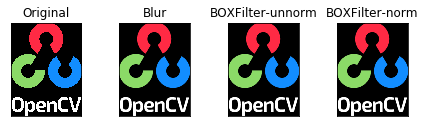

In [6]:
blur = cv.blur(logo, (5,5))
boxfilter = cv.boxFilter(logo, -1, (5, 5))
boxfilter_norm = cv.boxFilter(logo, -1, (5, 5), True)
plt.subplot(141), plt.imshow(logo), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(blur), plt.title('Blur')
plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(boxfilter), plt.title('BOXFilter-unnorm')
plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(boxfilter_norm), plt.title('BOXFilter-norm')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

## Gaussian Blurring

### 使用高斯核降噪
- dst	=	cv.GaussianBlur(	src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]	)
- 如果仅仅指定sigmaX，则sigmaY被设定为与sigmaX同值，如果两者都被指定为0， 则通过cv.getGaussianKernel(	ksize, sigma[, ktype]	)去计算

### cv.getGaussianKernel(	ksize, sigma[, ktype]	)返回ksize*1的高斯核系数矩阵
$$G_i= \alpha *e^{-(i-( \texttt{ksize} -1)/2)^2/(2* \texttt{sigma}^2)},$$
where $$\sum_i G_i=1, i=0...\texttt{ksize}-1$$

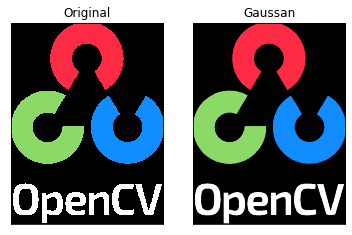

In [7]:
gauss_blur = cv.GaussianBlur(logo, (5, 5), 0)

plt.subplot(121), plt.imshow(logo), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gauss_blur), plt.title('Gaussan')
plt.xticks([]), plt.yticks([])
plt.show()

## Median Blurring

In [8]:
noise = cv.imread('../images/logo_noise.png')
cv_show('noise', noise)

In [9]:
median = cv.medianBlur(noise, 5)
cv_show('median', median)

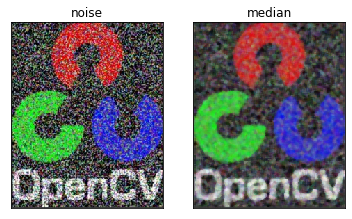

In [11]:
plt.subplot(121), plt.imshow(noise), plt.title('noise')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median), plt.title('median')
plt.xticks([]), plt.yticks([])
plt.show()

## Bilateral Filtering

### 双边滤波器——降噪同时保留边缘清晰

In [12]:
noi = cv.imread('../images/noise.png')
cv_show('noise', noi)

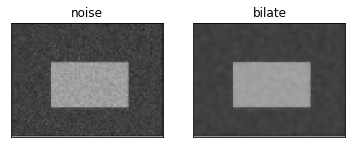

In [14]:
bilate = cv.bilateralFilter(noi, 9, 75, 75)
plt.subplot(121), plt.imshow(noi), plt.title('noise')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(bilate), plt.title('bilate')
plt.xticks([]), plt.yticks([])
plt.show()